In [46]:
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('U.S._Chronic_Disease_Indicators__CDI_.csv')

In [3]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,GeoLocation,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2015,2015,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,NaN,NaN,-,No data available,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,NaN,NaN,59,ALC,ALC8_0_2,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2012,2012,DC,District of Columbia,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,0.09,0.09,NaN,NaN,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,"(38.907192, -77.036871)",NaN,11,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2012,2012,GU,Guam,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,NaN,NaN,-,No data available,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,"(13.444304, 144.793731)",NaN,66,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2012,2012,PR,Puerto Rico,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,NaN,NaN,-,No data available,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,"(18.220833, -66.590149)",NaN,72,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2012,2012,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,NaN,NaN,-,No data available,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,NaN,NaN,59,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN


In [4]:
df.drop(['Response','DataValueFootnoteSymbol','DatavalueFootnote','StratificationCategory2','Stratification2', 'StratificationCategory3', 'Stratification3','ResponseID','StratificationCategoryID2', 'StratificationID2','StratificationCategoryID3','StratificationID3'],axis = 1,inplace=True)

In [5]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2015,2015,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,NaN,NaN,NaN,Overall,Overall,NaN,59,ALC,ALC8_0_2,USD,OVERALL,OVR
1,2012,2012,DC,District of Columbia,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,0.09,0.09,NaN,NaN,Overall,Overall,"(38.907192, -77.036871)",11,ALC,ALC8_0_1,USD,OVERALL,OVR
2,2012,2012,GU,Guam,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,NaN,NaN,NaN,Overall,Overall,"(13.444304, 144.793731)",66,ALC,ALC8_0_1,USD,OVERALL,OVR
3,2012,2012,PR,Puerto Rico,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,NaN,NaN,NaN,Overall,Overall,"(18.220833, -66.590149)",72,ALC,ALC8_0_1,USD,OVERALL,OVR
4,2012,2012,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,NaN,NaN,NaN,Overall,Overall,NaN,59,ALC,ALC8_0_1,USD,OVERALL,OVR


In [6]:
df.DataValueType.unique()

array(['US Dollars', 'Age-adjusted Prevalence', 'Crude Rate', 'Mean',
       'Crude Prevalence', 'Number', 'Age-adjusted Rate',
       'Age-adjusted Mean', 'Median', 'Yes/No',
       'Per capita alcohol consumption', 'Average Annual Crude Rate',
       'Average Annual Number', 'Percent',
       'Adjusted by age, sex, race and ethnicity',
       'Average Annual Age-adjusted Rate',
       'Local control of the regulation of alcohol outlet density',
       'Prevalence',
       'Commercial host (dram shop) liability status for alcohol service'],
      dtype=object)

In [7]:
df['GeoLocation'] = df['GeoLocation'].replace(to_replace='\(|\)', value="", regex=True)

In [8]:
lat = []
lng = []

for row in df['GeoLocation']:
    try:
        lat.append(row.split(',')[0])
        lng.append(row.split(',')[1])
    except:
        lat.append(np.NaN)
        lng.append(np.NaN)
        
df['Latitute'] = lat
df['longitude'] = lng

In [9]:
df['DataValue'] = df['DataValue'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [10]:
df.Topic.unique()

array(['Alcohol', 'Nutrition, Physical Activity, and Weight Status',
       'Cardiovascular Disease', 'Arthritis', 'Diabetes', 'Tobacco',
       'Overarching Conditions', 'Chronic Obstructive Pulmonary Disease',
       'Cancer', 'Chronic Kidney Disease', 'Asthma', 'Disability',
       'Oral Health', 'Older Adults', 'Mental Health', 'Immunization',
       'Reproductive Health'], dtype=object)

In [11]:
df_ckd = df[(df['Topic'] == 'Chronic Kidney Disease')]

In [15]:
df_ckd.dtypes

YearStart                      int64
YearEnd                        int64
LocationAbbr                  object
LocationDesc                  object
DataSource                    object
Topic                         object
Question                      object
DataValueUnit                 object
DataValueType                 object
DataValue                    float64
DataValueAlt                 float64
LowConfidenceLimit           float64
HighConfidenceLimit          float64
StratificationCategory1       object
Stratification1               object
GeoLocation                   object
LocationID                     int64
TopicID                       object
QuestionID                    object
DataValueTypeID               object
StratificationCategoryID1     object
StratificationID1             object
Latitute                      object
longitude                     object
dtype: object

In [12]:
df_ckd.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,Latitute,longitude
273,2010,2010,RI,Rhode Island,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,"cases per 100,000",Age-adjusted Rate,69.800003,69.8,65.1,74.6,Race/Ethnicity,"White, non-Hispanic","41.708280193, -71.522470314",44,CKD,CKD1_0,AGEADJRATE,RACE,WHT,41.708280193,-71.522470314
277,2014,2014,GA,Georgia,BRFSS,Chronic Kidney Disease,Prevalence of chronic kidney disease among adu...,%,Crude Prevalence,2.900000,2.9,2.2,3.7,Gender,Male,"32.839681093, -83.627580346",13,CKD,CKD3_0,CRDPREV,GENDER,GENM,32.839681093,-83.627580346
326,2013,2013,IN,Indiana,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,NaN,Number,5947.000000,5947.0,NaN,NaN,Overall,Overall,"39.766910452, -86.149960194",18,CKD,CKD1_0,NMBR,OVERALL,OVR,39.766910452,-86.149960194
328,2010,2010,MA,Massachusetts,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,NaN,Number,5128.000000,5128.0,NaN,NaN,Overall,Overall,"42.27687047, -72.082690675",25,CKD,CKD1_0,NMBR,OVERALL,OVR,42.27687047,-72.082690675
339,2010,2010,MD,Maryland,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,"cases per 100,000",Crude Rate,22.100000,22.1,17.5,27.7,Race/Ethnicity,Asian or Pacific Islander,"39.290580964, -76.609260111",24,CKD,CKD1_0,CRDRATE,RACE,API,39.290580964,-76.609260111


In [14]:
df_ckd.Stratification1.unique()

array(['White, non-Hispanic', 'Male', 'Overall',
       'Asian or Pacific Islander', 'Black, non-Hispanic',
       'American Indian or Alaska Native', 'Other, non-Hispanic',
       'Hispanic', 'Female', 'Multiracial, non-Hispanic'], dtype=object)

In [28]:
df_gender = df_ckd.loc[df_ckd['Stratification1'].isin(['Male','Female'])]
df_gender


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,Latitute,longitude
277,2014,2014,GA,Georgia,BRFSS,Chronic Kidney Disease,Prevalence of chronic kidney disease among adu...,%,Crude Prevalence,2.900000,2.9,2.2,3.7,Gender,Male,"32.839681093, -83.627580346",13,CKD,CKD3_0,CRDPREV,GENDER,GENM,32.839681093,-83.627580346
689,2014,2014,OK,Oklahoma,BRFSS,Chronic Kidney Disease,Prevalence of chronic kidney disease among adu...,%,Age-adjusted Prevalence,2.100000,2.1,1.6,2.6,Gender,Male,"35.472031356, -97.521070214",40,CKD,CKD3_0,AGEADJPREV,GENDER,GENM,35.472031356,-97.521070214
846,2015,2015,VI,Virgin Islands,BRFSS,Chronic Kidney Disease,Prevalence of chronic kidney disease among adu...,%,Crude Prevalence,NaN,NaN,NaN,NaN,Gender,Male,"18.335765, -64.896335",78,CKD,CKD3_0,CRDPREV,GENDER,GENM,18.335765,-64.896335
945,2013,2013,MT,Montana,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,"cases per 100,000",Crude Rate,63.599998,63.6,56.6,70.5,Gender,Male,"47.066528972, -109.424420645",30,CKD,CKD1_0,CRDRATE,GENDER,GENM,47.066528972,-109.424420645
1004,2010,2010,NV,Nevada,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,"cases per 100,000",Crude Rate,43.200001,43.2,39.7,46.8,Gender,Female,"39.49324039, -117.071840564",32,CKD,CKD1_0,CRDRATE,GENDER,GENF,39.49324039,-117.071840564
1021,2010,2010,SD,South Dakota,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,"cases per 100,000",Crude Rate,88.400002,88.4,79.2,97.5,Gender,Male,"44.353130053, -100.373530637",46,CKD,CKD1_0,CRDRATE,GENDER,GENM,44.353130053,-100.373530637
1032,2011,2011,MA,Massachusetts,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,NaN,Number,2570.000000,2570.0,NaN,NaN,Gender,Female,"42.27687047, -72.082690675",25,CKD,CKD1_0,NMBR,GENDER,GENF,42.27687047,-72.082690675
1034,2013,2013,SD,South Dakota,BRFSS,Chronic Kidney Disease,Prevalence of chronic kidney disease among adu...,%,Age-adjusted Prevalence,2.500000,2.5,1.9,3.4,Gender,Female,"44.353130053, -100.373530637",46,CKD,CKD3_0,AGEADJPREV,GENDER,GENF,44.353130053,-100.373530637
1217,2014,2014,WI,Wisconsin,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,NaN,Number,2060.000000,2060.0,NaN,NaN,Gender,Female,"44.393191174, -89.816370742",55,CKD,CKD1_0,NMBR,GENDER,GENF,44.393191174,-89.816370742
1425,2010,2010,DE,Delaware,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,NaN,Number,367.000000,367.0,NaN,NaN,Gender,Female,"39.008830667, -75.577741168",10,CKD,CKD1_0,NMBR,GENDER,GENF,39.008830667,-75.577741168


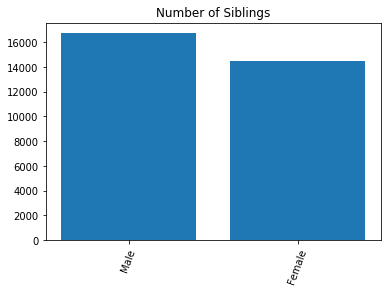

In [29]:
## distribution of kidney disease based on gender
plt.bar('Stratification1', 'DataValue', data = df_gender)
plt.xticks(rotation = 70)
plt.title('Chronic Kidney Disease');

In [34]:
df_ckd = df_ckd[(df_ckd['LocationAbbr'] != 'US')]

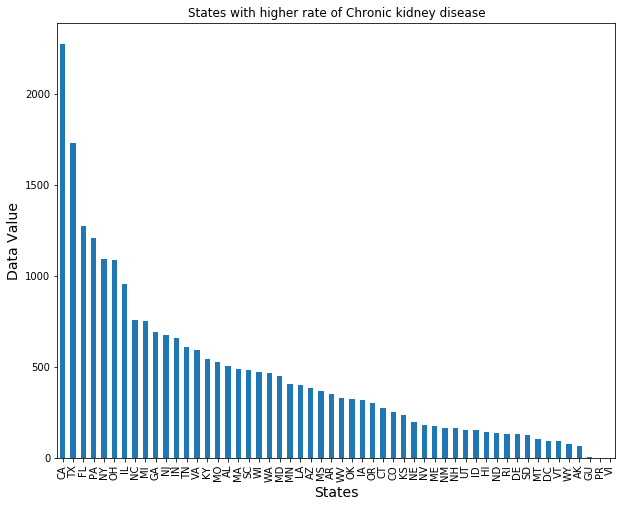

In [45]:
##now look which state has higher data value of chronic kidney disease
df_ckd.groupby(['LocationAbbr'])['DataValue'].mean().sort_values(ascending=False, na_position='first').plot(kind='bar',figsize=(10,8))
plt.xlabel('States',fontsize=14)
plt.ylabel('Data Value',fontsize=14)
plt.xticks(rotation = 90,fontsize=10)
plt.title('States with higher rate of Chronic kidney disease');